In [1]:
%reload_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
from PIL import Image
import os.path

In [3]:
path = Path("Desktop")
path

PosixPath('Desktop')

In [4]:
data = pd.read_csv(path/'Trump and Fed - After.csv')
data;

In [5]:
text = data.text.values

In [6]:
from collections import Counter

In [7]:
Counter(text).most_common()

[('As usual the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing which will be announced shortly. We have a very strong dollar and a very weak Fed. I will work “brilliantly” with both and the U.S. will do great...',
  2),
 ('European Central Bank acting quickly Cuts Rates 10 Basis Points. They are trying and succeeding in depreciating the Euro against the VERY strong Dollar hurting U.S. exports.... And the Fed sits and sits and sits. They get paid to borrow money while we are paying interest!',
  1),
 ('The Federal Reserve should get our interest rates down to ZERO or less and we should then start to refinance our debt. INTEREST COST COULD BE BROUGHT WAY DOWN while at the same time substantially lengthening the term. We have the great currency power and balance sheet.....',
  1),
 ('....The USA should always be paying the the lowest rate. No Inflation! It is only the naïveté of Jay Powell and the Federal Reserve that doesn’t allow us to 

In [8]:
skips = ["China", "Trump", "President", "Trade", "Russia", "Mexico", "chinese", "Fed",'Federal', 'Reserve']
for i in skips:
    STOPWORDS.add(i)

In [10]:
STOPWORDS;

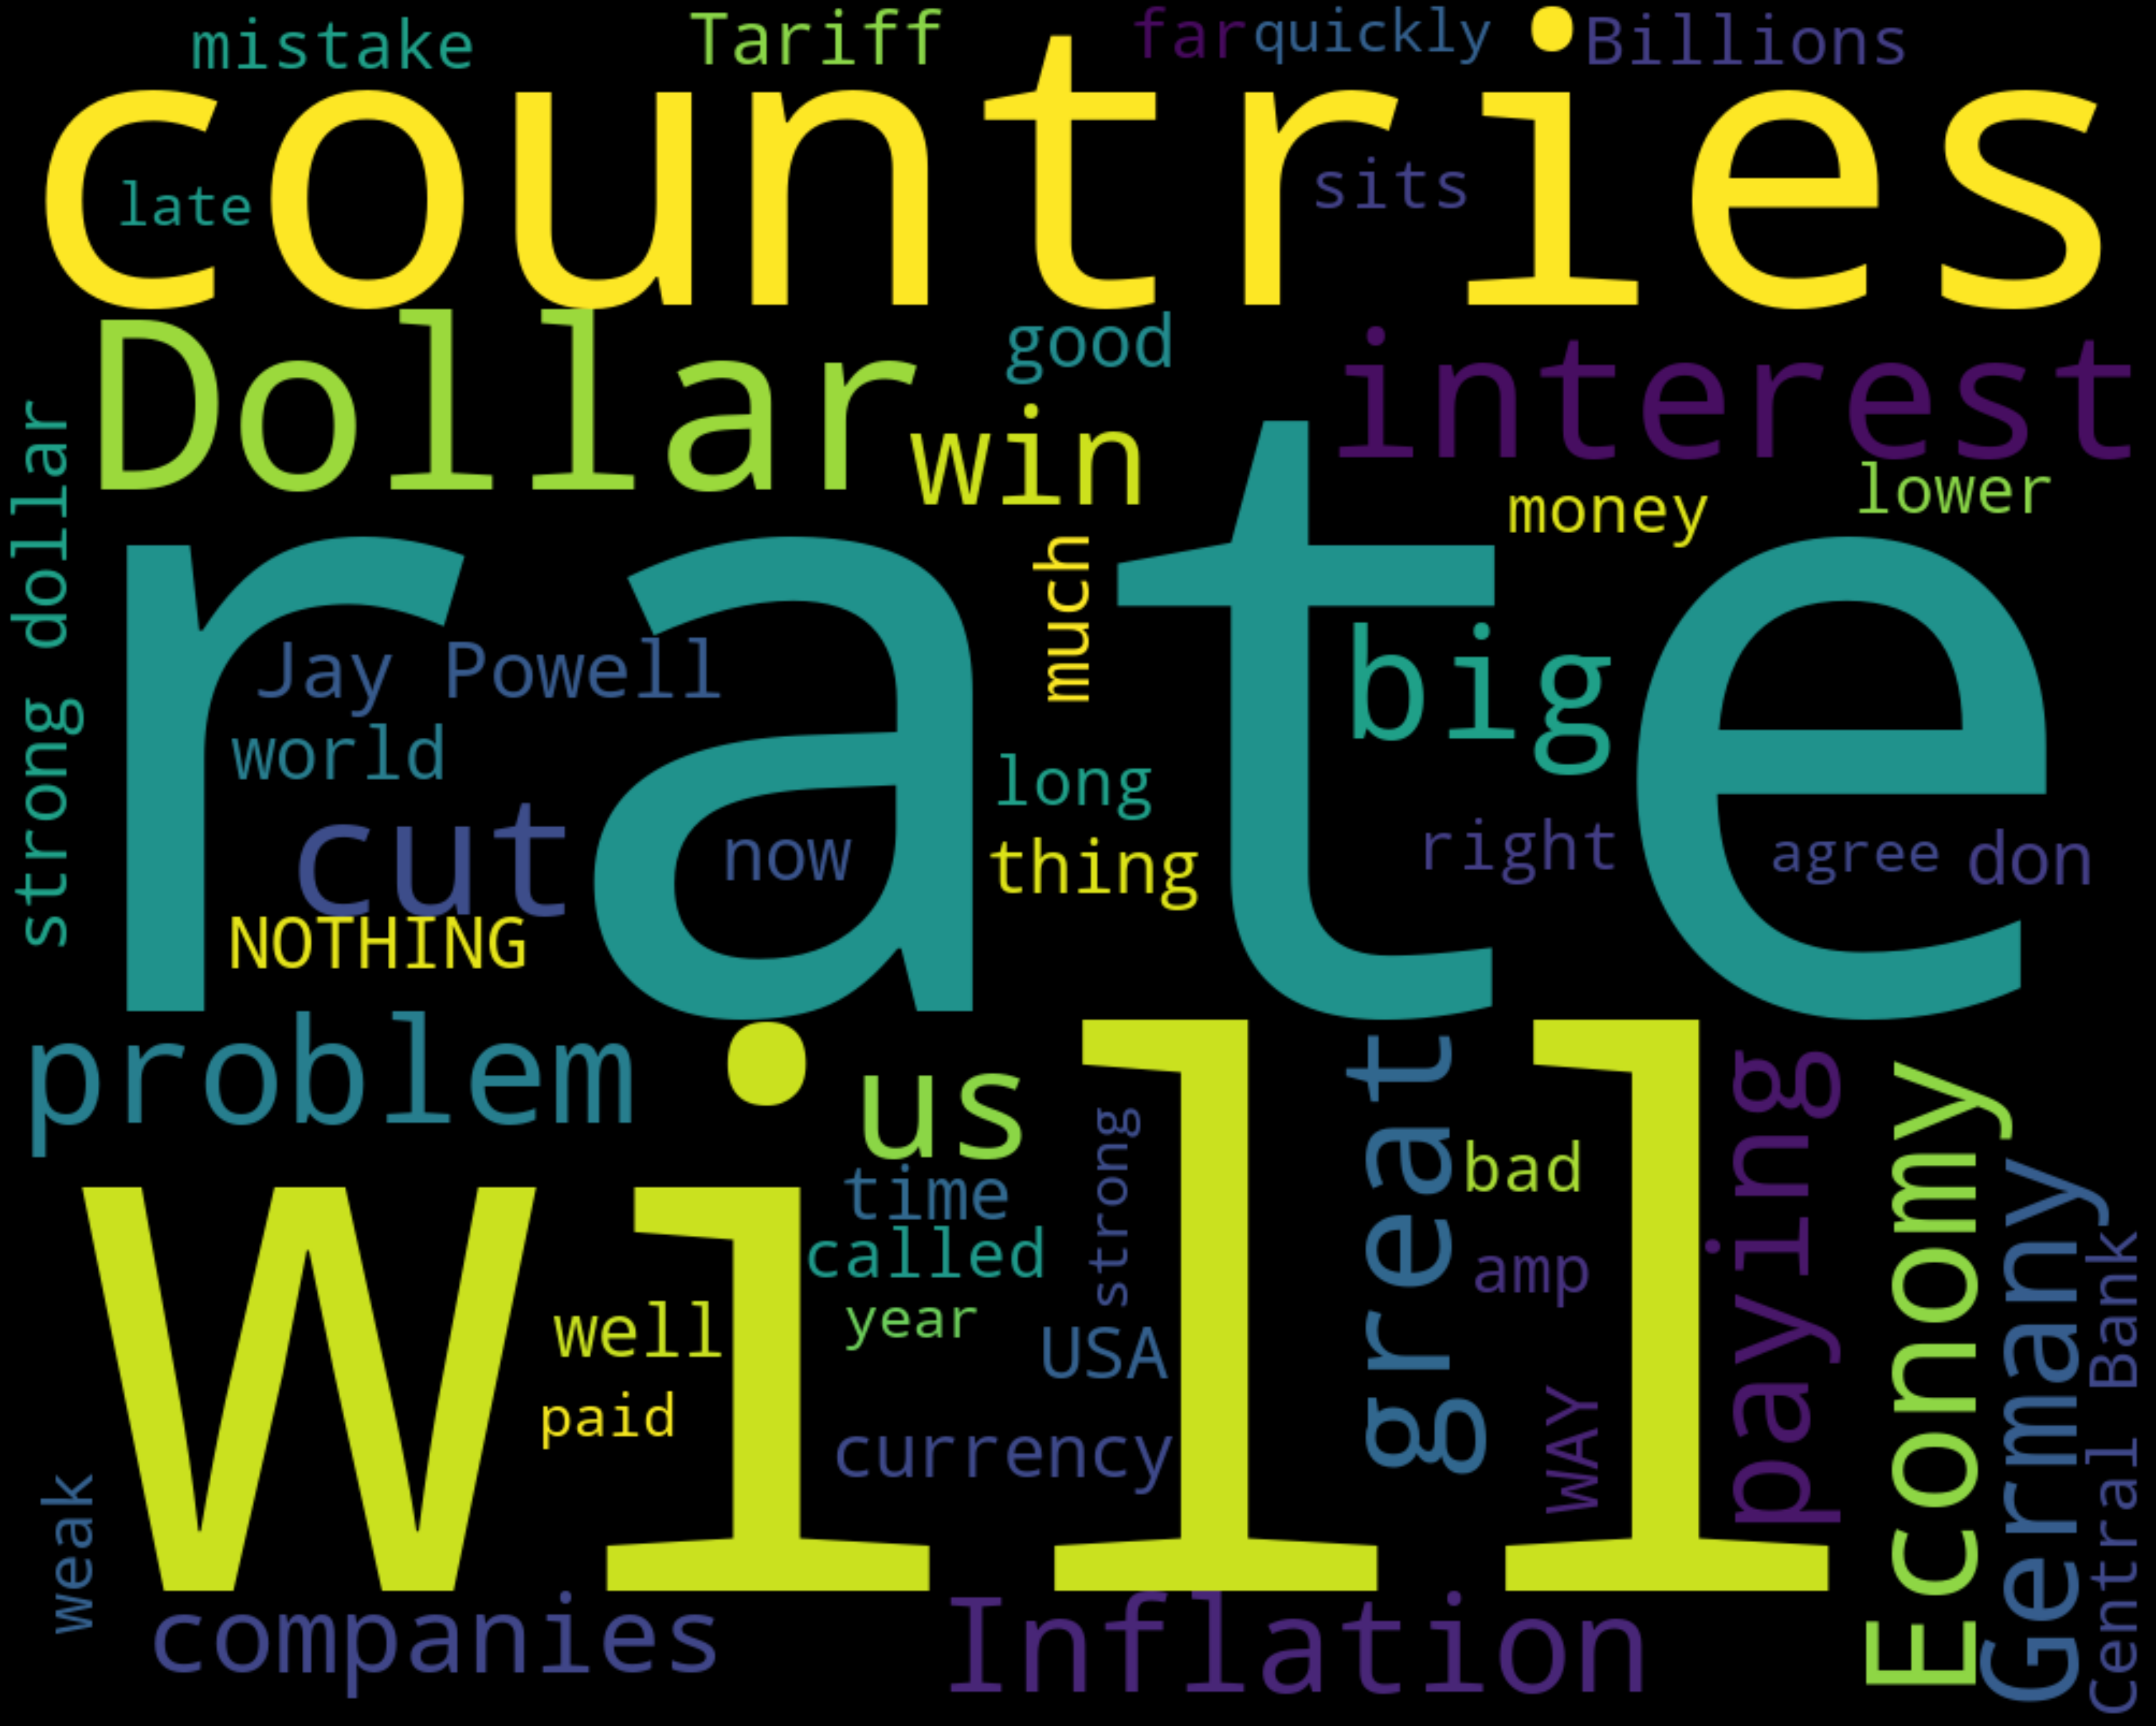

In [9]:
wordcloud = WordCloud(
    width = 1000,
    height = 800,
    max_words= 50, 
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (50, 40),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [10]:
from textblob import TextBlob

In [13]:
opinion = TextBlob(text)

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'numpy.ndarray'>

In [12]:
opinion.sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [15]:
data['sentiment'] = data['text'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [16]:
data

,text,created_at,retweet_count,favorite_count,is_retweet,id_str,sentiment
0,European Central Bank acting quickly Cuts Rate...,09-12-2019 12:13:09,17202,59735,False,1172120964232093697,"(0.20750000000000002, 0.3406666666666666)"
1,The Federal Reserve should get our interest ra...,09-11-2019 10:42:13,17202,58962,False,1171735691769929728,"(0.06444444444444444, 0.3038888888888889)"
2,....The USA should always be paying the the lo...,09-11-2019 10:42:13,17202,45431,False,1171735692428419072,"(-0.10833333333333334, 0.47500000000000003)"
3,China just enacted a major stimulus plan. With...,09-07-2019 3:05:01,17202,65719,False,1170171081853931520,"(0.0390625, 0.25)"
4,“China is eating the Tariffs.” Billions pourin...,09-06-2019 15:14:20,17202,76169,False,1169992234382610432,"(0.14375, 0.8)"
5,I agree with @jimcramer the Fed should lower r...,09-06-2019 12:22:25,17202,42043,False,1169948967947395072,"(0.21000000000000002, 0.32999999999999996)"
6,....that our economy is very strong. If the Fe...,09-06-2019 3:33:33,17202,50784,False,1169815875966210049,"(0.3816666666666667, 0.5766666666666667)"
7,Germany and so many other countries have negat...,09-03-2019 13:45:24,17202,52750,False,1168882690713690112,"(-0.20375000000000001, 0.44000000000000006)"
8,If the Fed would cut we would have one of the ...,08-30-2019 14:10:13,17202,53289,False,1167439383932391425,"(-0.2301020408163265, 0.5144557823129252)"
9,The Euro is dropping against the Dollar “like ...,08-30-2019 13:55:41,17202,63312,False,1167435723823341568,"(0.024999999999999994, 0.41250000000000003)"


In [17]:
data2 = pd.read_csv(path/'Trump and Fed - Before.csv')
data2;

In [18]:
data2['sentiment'] = data2['text'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [19]:
data2

,text,created_at,retweet_count,favorite_count,is_retweet,id_str,sentiment
0,....As usual Powell let us down but at least h...,07-31-2019 20:41:18,14556,67982,False,1156666164732473345,"(0.02675736961451248, 0.3990929705215419)"
1,What the Market wanted to hear from Jay Powell...,07-31-2019 20:41:17,15380,71716,False,1156666163310530560,"(-0.0625, 0.1875)"
2,The Fed “raised” way too early and way too muc...,07-29-2019 13:18:14,15711,74145,False,1155829888701673472,"(0.05357142857142857, 0.46785714285714286)"
3,....countries that know how to play the game a...,07-29-2019 13:18:14,13853,67617,False,1155829890903617536,"(0.04047619047619048, 0.5047619047619047)"
4,The E.U. and China will further lower interest...,07-29-2019 11:48:54,14535,60548,False,1155807406812782592,"(-0.18374999999999994, 0.4813333333333333)"
5,Q2 GDP Up 2.1% Not bad considering we have the...,07-26-2019 14:40:26,15792,70349,False,1154763413358370816,"(0.012499999999999956, 0.6583333333333333)"
6,It is far more costly for the Federal Reserve ...,07-22-2019 12:05:12,13383,56692,False,1153274794579767296,"(0.08914141414141413, 0.41717171717171714)"
7,With almost no inflation our Country is needle...,07-22-2019 12:02:19,16949,81109,False,1153274069028089856,"(0.015624999999999986, 0.496875)"
8,....Fed: There is almost no inflation!,07-19-2019 13:42:16,9907,49698,False,1152212059263819777,"(0.0, 0.0)"
9,I like New York Fed President John Williams fi...,07-19-2019 13:38:21,12955,67088,False,1152211071350054913,"(0.13057851239669424, 0.4792011019283746)"
